# Data Science and Modelling

## 4 - Statistical Estimators

### Summary Estimators

##### Exercise 4.1

In [141]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

arr_1 = np.random.normal(loc=50, scale=20, size=(1))
est_mean_1 = arr_1.mean()
print(f"Estimate mean from sample of 1  : {est_mean_1:.3f}")

np.random.seed(0)

arr_10 = np.random.normal(loc=50, scale=20, size=(10))
est_mean_10 = arr_10.mean()
print(f"Estimate mean from sample of 10 : {est_mean_10:.3f}")

np.random.seed(0)

arr_100 = np.random.normal(loc=50, scale=20, size=(100))
est_mean_100 = arr_100.mean()
print(f"Estimate mean from sample of 100: {est_mean_100:.3f}")

np.random.seed(0)

arr_1e5 = np.random.normal(loc=50, scale=20, size=(10**5))
est_mean_1e5 = arr_1e5.mean()
print(f"Estimate mean from sample of 1e5: {est_mean_1e5:.3f}")

Estimate mean from sample of 1  : 85.281
Estimate mean from sample of 10 : 64.760
Estimate mean from sample of 100: 51.196
Estimate mean from sample of 1e5: 50.032


We see the results get closer to 50 as number of samples increases. 

##### Exercise 4.2

In [142]:
means = np.empty((10**5), dtype=float)
np.random.seed(0)

for i in range(10**5):
    sample = np.random.normal(loc=50, scale=20, size=(10**3))
    means[i] = sample.mean()

print(f"Mean of means: {means.mean():.3f}")
print(f"Stddev of means: {means.std():.3f}")

print(f"Nominal stddev = {20/np.sqrt(1000):.3f}")

Mean of means: 50.001
Stddev of means: 0.633
Nominal stddev = 0.632


#### Bias of the estimators

To examine the bias of an estimator, we consider samples of 5 points from a Gaussian. We take 10,000 trials of this process, and look at the overall behaviour of each trial. Each row of the following array is a different sample of our Gaussian from each trial, and each column is one of the 5 data points drawn.

Our Gaussian has a mean of 50, and a standard deviation of 10. This implies a variance of 10 squared, or 100.

In [143]:
n_trials = 10000
n_samples = 5

dist_mean = 50
dist_std = 10

samples = np.random.normal(loc=dist_mean, scale=dist_std, size=(n_trials, n_samples))

An example of one of our samples:

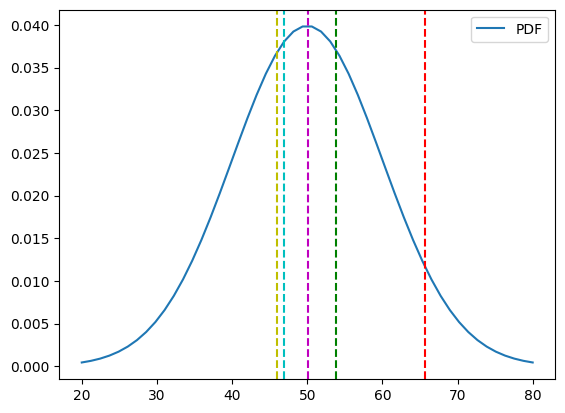

In [144]:
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm


x = np.linspace(20, 80)
y = norm(dist_mean, dist_std).pdf(x)

c = ["r", "g", "y", "c", "m"]

fig, ax = plt.subplots()
ax.plot(x, y, label="PDF")
for i in range(n_samples):
    ax.axvline(x=samples[0, i], c=c[i], linestyle="--")
ax.legend()

There are 9,999 other samples of 5 points like this one

Now we look at the sample mean of each, and plot a histogram of the results (more on these later).

Estimated Mean =  50.1
True Mean      =  50


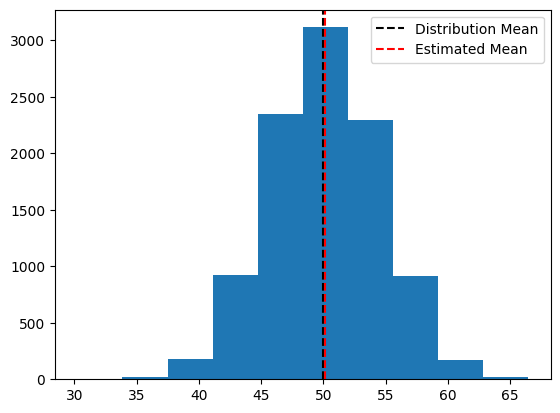

In [145]:
import matplotlib.pyplot as plt


means = np.sum(samples, axis=1) / n_samples
fig, ax = plt.subplots()
ax.hist(means)
ax.axvline(x=dist_mean, linestyle="--", color="k", label="Distribution Mean")
ax.axvline(x=means.mean(), linestyle="--", color="r", label="Estimated Mean")
ax.legend()

print("Estimated Mean = ", round(means.mean(), 2))
print("True Mean      = ", round(dist_mean, 2))

Now let's calculate the naive variance, and compare this to the underlying distribution one.

Estimated Variance =  79.52
True Variance      =  100


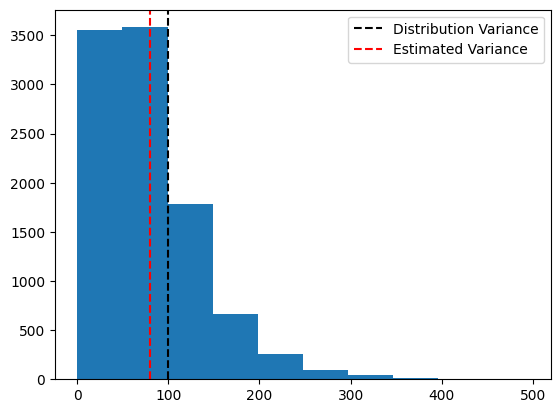

In [146]:
variances = np.sum((samples - means[:, None]) ** 2, axis=1) / n_samples

fig, ax = plt.subplots()
ax.hist(variances)

ax.axvline(x=dist_std**2, linestyle="--", color="k", label="Distribution Variance")
ax.axvline(x=variances.mean(), linestyle="--", color="r", label="Estimated Variance")
ax.legend()
print("Estimated Variance = ", round(variances.mean(), 2))
print("True Variance      = ", round(dist_std**2, 2))

Our estimated variance has come in on average a lower than the population variance! 

This estimator is biased. As the number of points in each sample increases the estimator will get closer to the distribution value, but will still on average be less than the true value.

Let's now "correct" our estimator with the Bessel correction, and see what happens.

Estimated Variance =  99.4
True Variance      =  100


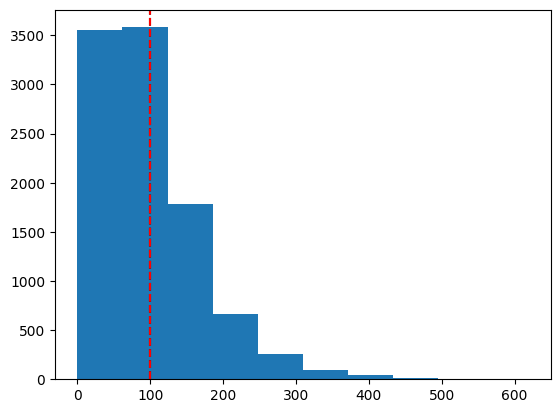

In [147]:
corrected_variances = (n_samples / (n_samples - 1)) * variances

fig, ax = plt.subplots()
ax.hist(corrected_variances)

ax.axvline(x=dist_std**2, linestyle="--", color="k", label="Distribution Variance")
ax.axvline(
    x=corrected_variances.mean(), linestyle="--", color="r", label="Estimated Variance"
)

print("Estimated Variance = ", round(corrected_variances.mean(), 2))
print("True Variance      = ", round(dist_std**2, 2))

Now the two are close again! This is an "unbiased" estimator. 

What if we used the population mean in calculating our sample variance? This is not what is usually meant by sample variance, but let's see what happens

Estimated Variance =  99.29
True Variance      =  100


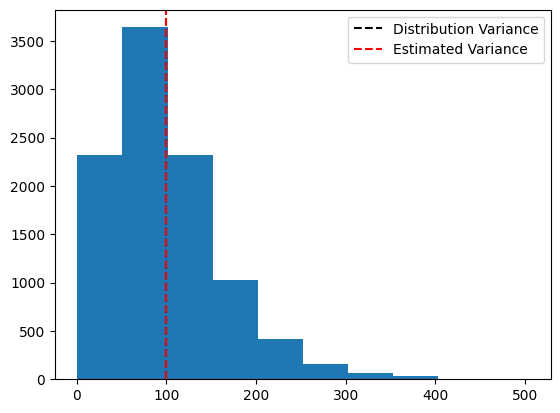

In [148]:
variances_proper = np.sum((samples - dist_mean) ** 2, axis=1) / (n_samples)

fig, ax = plt.subplots()
ax.hist(variances_proper)

ax.axvline(x=dist_std**2, linestyle="--", color="k", label="Distribution Variance")
ax.axvline(
    x=variances_proper.mean(), linestyle="--", color="r", label="Estimated Variance"
)
ax.legend()
print("Estimated Variance = ", round(variances_proper.mean(), 2))
print("True Variance      = ", round(dist_std**2, 2))

This is also an unbiased estimator. But we usually don't actually know the population mean, so this isn't so helpful.

Back to our sample variance from the sample mean, after the Bessel correction. Once we take the square root of this variance, we should get the standard deviation... right?

Estimated Standard Deviation =  9.38
True Standard Deviation      =  10


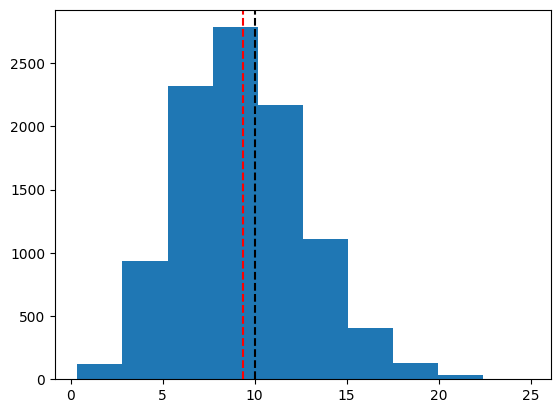

In [149]:
std_devs = np.sqrt(corrected_variances)

fig, ax = plt.subplots()
ax.hist(std_devs)

ax.axvline(
    x=dist_std, linestyle="--", color="k", label="Distribution Standard Deviation"
)
ax.axvline(
    x=std_devs.mean(), linestyle="--", color="r", label="Estimated Standard Deviation"
)

print("Estimated Standard Deviation = ", round(std_devs.mean(), 2))
print("True Standard Deviation      = ", round(dist_std, 2))

It may not seem by much, but this is once again an underestimation of the distributions standard deviation. The Bessel correction is not enough to correct the estimation of the standard deviation. In fact, we cannot simultaneously correct both the variance and standard deviation, only one or the other!

### Histograms

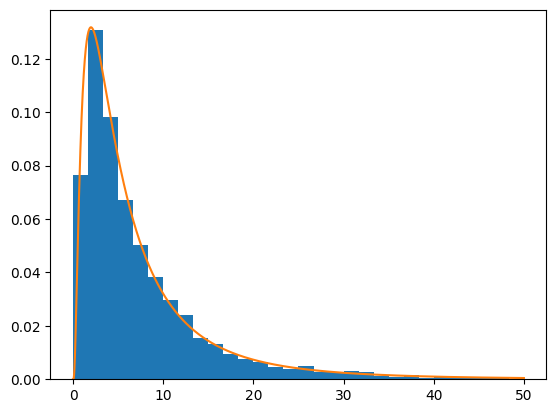

In [150]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

data = ss.lognorm.rvs(0.96, loc=0, scale=5, size=5000)
myHist = plt.hist(data, 30, range=(0, 50), density=True)
x = np.arange(0, 50, 0.001)
plt.plot(x, ss.lognorm.pdf(x, 0.96, 0, 5))

##### Exercise 4.3

With 10 bins and 500 samples

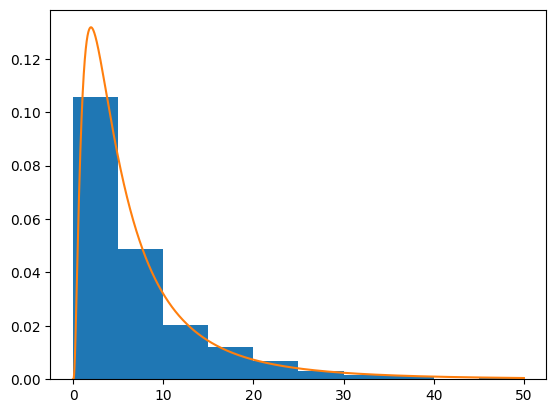

In [151]:
data = ss.lognorm.rvs(0.96, loc=0, scale=5, size=500)
myHist = plt.hist(data, 10, range=(0, 50), density=True)
x = np.arange(0, 50, 0.001)
plt.plot(x, ss.lognorm.pdf(x, 0.96, 0, 5))

With 100 bins and 50,000 samples

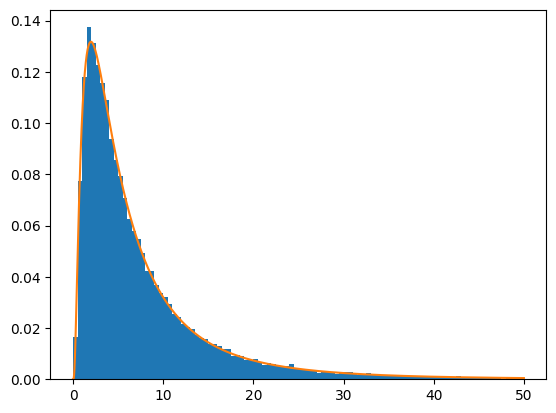

In [152]:
data = ss.lognorm.rvs(0.96, loc=0, scale=5, size=50000)
myHist = plt.hist(data, 100, range=(0, 50), density=True)
x = np.arange(0, 50, 0.001)
plt.plot(x, ss.lognorm.pdf(x, 0.96, 0, 5))

What if we go to far? 1000 bins for 50 samples?

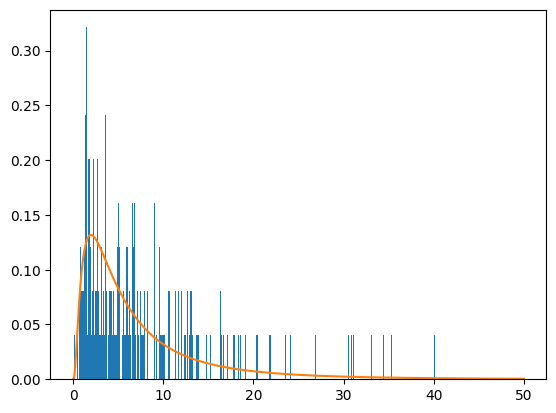

In [153]:
data = ss.lognorm.rvs(0.96, loc=0, scale=5, size=500)
myHist = plt.hist(data, 1000, range=(0, 50), density=True)
x = np.arange(0, 50, 0.001)
plt.plot(x, ss.lognorm.pdf(x, 0.96, 0, 5))

##### Exercise 4.4

A Gaussian with mean 60, std dev 15, with 10,000 samples in 100 bins

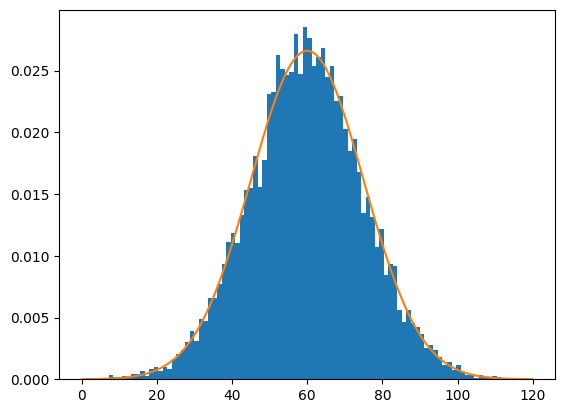

In [154]:
data = ss.norm.rvs(loc=60, scale=15, size=10000)
myHist = plt.hist(data, 100, range=(0, 120), density=True)
x = np.arange(0, 120, 0.001)
plt.plot(x, ss.norm.pdf(x, 60, 15))

#### 2D Hist

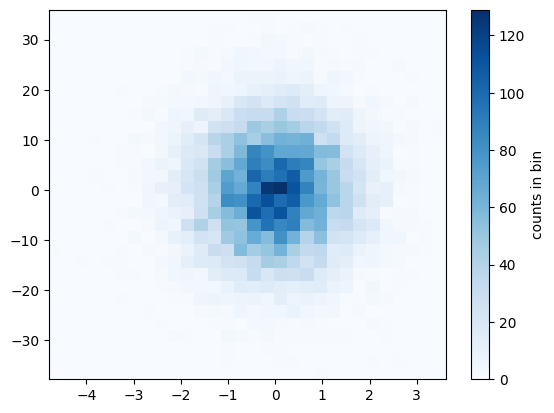

In [155]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]    # covarience rotates along xy-plane 
x, y = np.random.multivariate_normal(mean, cov, 10000).T

import matplotlib.pyplot as plt

plt.hist2d(x, y, bins=30, cmap="Blues")
cb = plt.colorbar()
cb.set_label("counts in bin")

### Sampling

#### Inverse CDF

We can use the inverse of the CDF as a method of sampling an arbitrary PDF. This involves being able to find the CDF and then invert it, which is not often easy.

We start with the CDF. Let's look at our Gaussian with $\mu=50$ and $\sigma=10$. Finding the CDF of this:

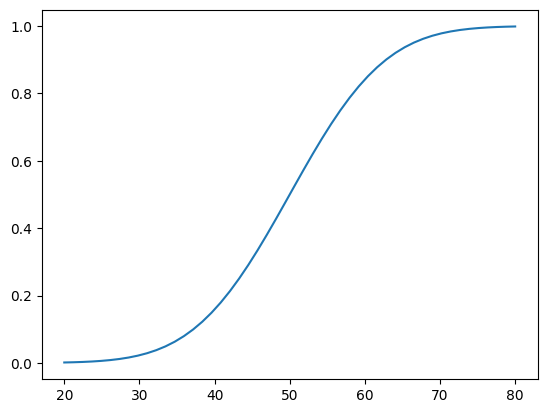

In [156]:
from scipy.stats import norm

distribution = norm(loc=50, scale=10)

x = np.linspace(20, 80)
y = distribution.cdf(x)

fig, ax = plt.subplots()
ax.plot(x, y)

As always, this goes from 0 to 1 in the y-axis. We can look at the inverse using the `ppf` (percent point function) function:

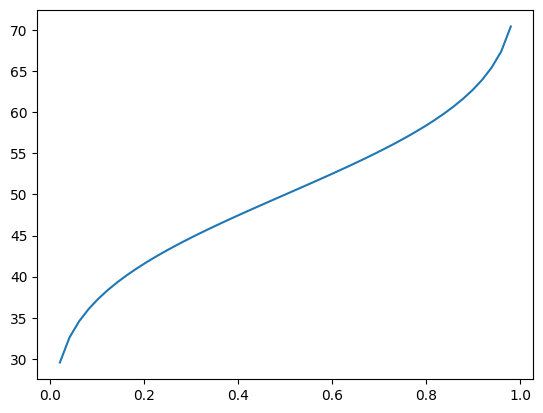

In [157]:
from scipy.stats import norm

distribution = norm(loc=50, scale=10)


x = np.linspace(0, 1)
y = distribution.ppf(x)

fig, ax = plt.subplots()
ax.plot(x, y)

We now take a uniform random sample from between 0 and 1, and compute the inverse CDF / PPF of each point. The resultant points will be a sample of our original PDF:

(0.0, 1.0)

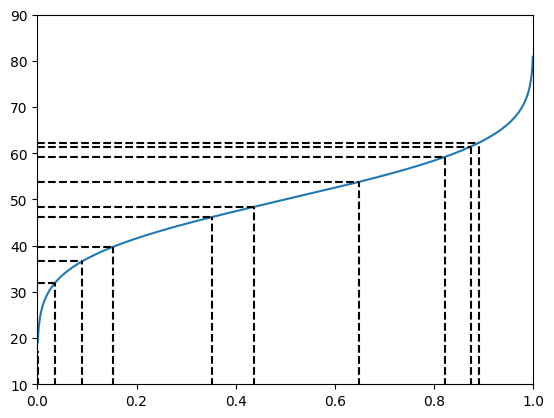

In [158]:
from scipy.stats import norm

distribution = norm(loc=50, scale=10)
n_sample = 10

x = np.linspace(0, 1, 1000)
y = distribution.ppf(x)


x_sample = np.random.rand(n_sample)
y_sample = distribution.ppf(x_sample)

fig, ax = plt.subplots()
ax.plot(x, y)
for i in range(n_sample):
    ax.plot([x_sample[i], x_sample[i]], [0, y_sample[i]], linestyle="--", color="k")
    ax.plot([0, x_sample[i]], [y_sample[i], y_sample[i]], linestyle="--", color="k")

ax.set_ylim(10, 90)
ax.set_xlim(0, 1)

This may be hard to see here, but if we take a large sample, and then a histogram of the result:

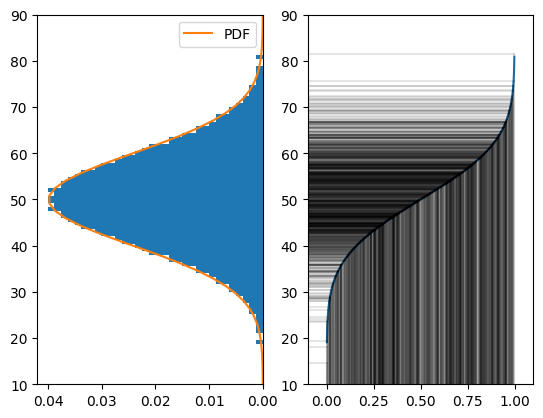

In [159]:
from scipy.stats import norm

distribution = norm(loc=50, scale=10)
n_sample = 1000

x = np.linspace(0, 1, 1000)
y = distribution.ppf(x)


x_sample = np.random.rand(n_sample)
y_sample = distribution.ppf(x_sample)

fig, ax = plt.subplots(1, 2)
ax[1].plot(x, y)
for i in range(n_sample):
    ax[1].plot([x_sample[i], x_sample[i]], [0, y_sample[i]], color="k", alpha=0.1)
    ax[1].plot([-1, x_sample[i]], [y_sample[i], y_sample[i]], color="k", alpha=0.1)


ax[1].set_ylim(10, 90)
ax[1].set_xlim(-0.1, 1.1)

yhist = np.linspace(10, 90)
xhist = distribution.pdf(yhist)

ax[0].hist(y, 100, range=(10, 90), density=True, orientation="horizontal")
ax[0].set_xlim(0.042, 0)
ax[0].set_ylim(10, 90)
ax[0].plot(xhist, yhist, label="PDF")
ax[0].legend()

#### Rejection Sampling

##### Exercise 4.5

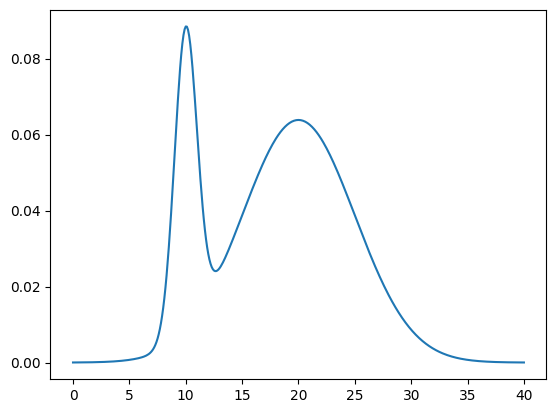

In [171]:
from scipy import stats


def p(x):
    return 0.8 * stats.norm.pdf(x, loc=20, scale=5) + 0.2 * stats.norm.pdf(
        x, loc=10, scale=1
    )


x = np.linspace(0, 40, 401, endpoint=True)
pdf = p(x)
fig, ax = plt.subplots()
ax.plot(x, pdf)

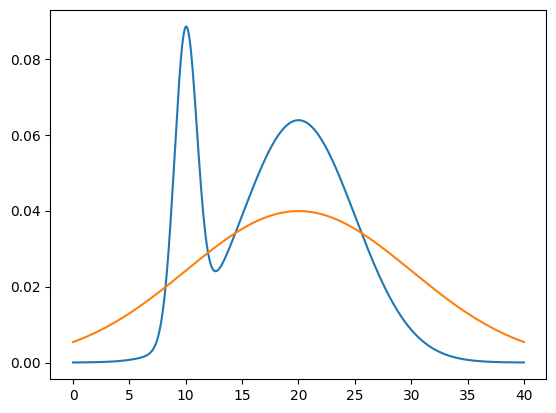

In [172]:
def q(x):
    return stats.norm.pdf(x, loc=20, scale=10)


x = np.arange(0, 40, 0.001)
plt.plot(x, p(x))
plt.plot(x, q(x))

##### Exercise 4.6

Scale factor k = 3.662


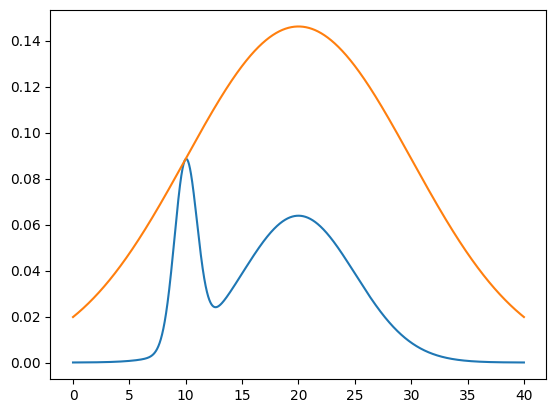

In [173]:
k = np.max(p(x) / q(x))
plt.plot(x, p(x))
plt.plot(x, k * q(x))
print(f"Scale factor k = {k:.3f}")

We can see the algorithm in action below. We propose a point $z$ that may or may not end up as part of our sample, using any distribution we want (here we use a Gaussian). We then propose another number $u$ from a uniform distribution on the interval $[0,k\times q(z)]$. This number will be between 0 and the orange PDF at the point $z$. Now, we check if $u$ is greater or less than $p(z)$, the blue PDF we are trying to sample, at the point $z$. If less, $z$ becomes part of our sample. If more, $z$ is tossed out.

In regions where $p(z)$ is large, $z$ has a better chance of being accepted, whereas if $p(z)$ is small the point is very likely to be rejected. The end result is a distribution matching our PDF.

Run the below cell multiple times, and each time you'll see a point $z$ be proposed (the bottom dot), a value $u$ be generated (the top dot), and $u$ checked if it is above or below $p(z)$. If below, $z$ is accepted and the points are green, if above, $z$ is rejected and the points are red. 

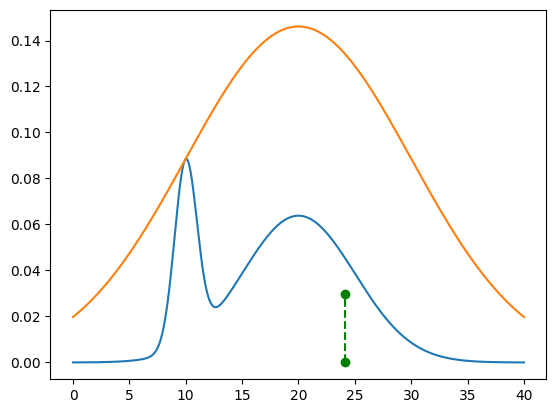

In [236]:
k = np.max(p(x) / q(x))

z = np.random.normal(20, 10)
u = np.random.uniform(0, k * q(z))

plt.plot(x, p(x))
plt.plot(x, k * q(x))
plt.plot([z, z], [0, u], linestyle="--", c="g" if u <= p(z) else "r")
plt.scatter([z, z], [0, u], marker="o", c="g" if u <= p(z) else "r")
# print(f"Scale factor k = {k:.3f}")

##### Exercise 4.7

Number of surviving sample points = 27453


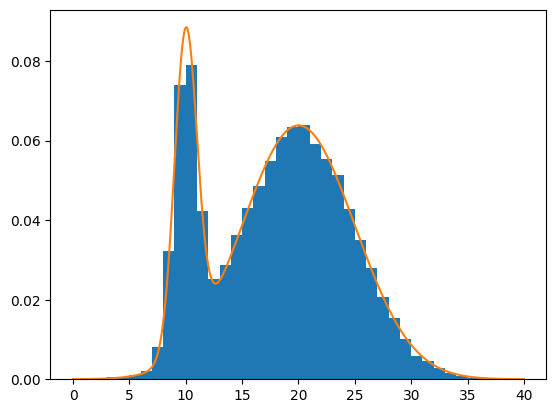

In [233]:
def rejection_sampling(iter=1000):
    samples = []
    for i in range(iter):
        z = np.random.normal(20, 10)
        u = np.random.uniform(0, k * q(z))
        if u <= p(z):
            samples.append(z)
    return np.array(samples)


samples = rejection_sampling(100000)


fig, ax = plt.subplots()
ax.hist(samples, 40, range=(0, 40), density=True)
ax.plot(x, p(x))

print(f"Number of surviving sample points = {len(samples)}")

#### Error Bars

Drawing a sample using rejection sampling with 10000 tries from the above distribution, and using $\sqrt{n}$ for $n$ the population of the bin as the error. 

We are normalising the histogram such that the total integral is 1. Each bin value is then $$\text{bin height}=n/N,$$ for $N$ the total sample size. We scale the error the same, to $\sqrt{n}/N$, which we get as $$\text{error} = \sqrt{n}/N= \sqrt{n/N^2} =\sqrt{\text{bin height}/N}.$$

Annoyingly we must use Matplotlib's `errorbar` function, which requires obtaining the height of the bins and edges from the `hist` function, and computing the bin centre point.  

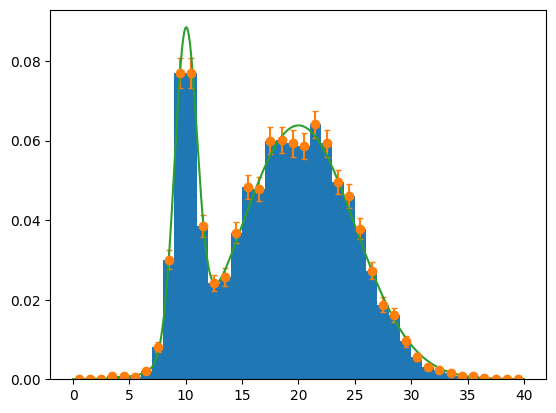

In [238]:
samples = rejection_sampling(20000)

N = len(samples)

fig, ax = plt.subplots()
entries, edges, _ = ax.hist(samples, 40, range=(0, 40), density=True)   # = bin height & edges
centres = (edges[1:] + edges[:-1]) / 2
ax.errorbar(centres, entries, yerr=np.sqrt(entries / N), fmt="o", capsize=2)
ax.plot(x, p(x))

I'll leave it to you how to make this plot a little more visually appealing, it's not great as it is

### Covariance

##### Exercise 4.8

We'll do this "by-hand"... but let's still use Python though :P

In [166]:
x = np.array([[0, 2], [1, 1], [2, 0]]).T
cov_x = np.cov(x)
print(cov_x)

N = len(x[0])
for i in [0, 1]:
    for j in [0, 1]:
        i_factor = x[i, :] - x[i, :].mean()
        j_factor = x[j, :] - x[j, :].mean()
        Sigma_ij = (1 / (N - 1)) * np.sum(i_factor * j_factor)
        print(f"{i=},{j=}, {Sigma_ij = :.3f}")

[[ 1. -1.]
 [-1.  1.]]
i=0,j=0, Sigma_ij = 1.000
i=0,j=1, Sigma_ij = -1.000
i=1,j=0, Sigma_ij = -1.000
i=1,j=1, Sigma_ij = 1.000


We can see from this that Numpy's `cov` function uses the unbiased sample estimator. To use $1/N$ as the coefficient if you need it (for some reason), you can use the keyword `bias=True` in the function.

### Chi-squared test

##### Exercise 4.9

In [167]:
import scipy.stats as ss
import numpy as np

bin_width = 2
bins = np.arange(-0.5 * bin_width + 1, 40, bin_width)
pdfvalues = ss.lognorm.rvs(0.96, loc=0, scale=5, size=5000)
histogram, bins = np.histogram(pdfvalues, bins=bins, density=True)

bin_centers = 0.5 * (bins[1:] + bins[:-1])
print(bin_centers)

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37.]


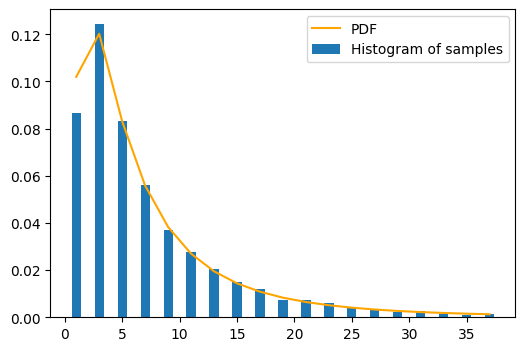

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37.]


In [168]:
pdf = ss.lognorm.pdf(bin_centers, 0.96, loc=0, scale=5)

from matplotlib import pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF", color="orange")
plt.legend()
plt.show()
print(bin_centers)

In [169]:
from scipy.stats import chisquare

pdf = pdf * np.sum(histogram) / np.sum(pdf)
chi_statistic, p_value = chisquare(histogram, pdf)
print(chi_statistic, p_value)

0.0032635741579841527 1.0


The small value of $\chi^2$ indicates the PDF agrees well with the data we have collected.

##### Exercise 4.10

In [170]:
residue = (histogram - pdf) ** 2  # numerator of the chi2 stat
chi2 = np.sum(residue / pdf)

print(f"chi2 = {chi2:.5f}")

chi2 = 0.00326


This matches the result of the `chisquare` function